In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option("display.max_rows",892) 
dataset = sns.load_dataset("titanic")

# Data ready

In [134]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [135]:
dataset.shape

(891, 15)

In [136]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [138]:
(dataset.isnull().sum()/dataset.shape[0])*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [139]:
dataset.drop(["embarked","survived","deck"],axis=1,inplace=True)

In [140]:
dataset["age"].fillna(dataset["age"].mean(),inplace=True)

In [141]:
mo= dataset["embark_town"].mode()
dataset["embark_town"].fillna(mo[0],inplace=True)

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataset["alive"])
p=le.transform(dataset["alive"])
p1 = pd.DataFrame(p,columns=["alive"])
p1 = p1["alive"].astype("int64")

In [143]:
# for i,j in zip(dataset["survived"],p):
#     if i==j:
#         pass
#     else:
#         print("no match")

In [5]:
for i,j in zip(dataset["sibsp"],dataset["parch"]):
    if i==j:
        pass
    else:
        pass

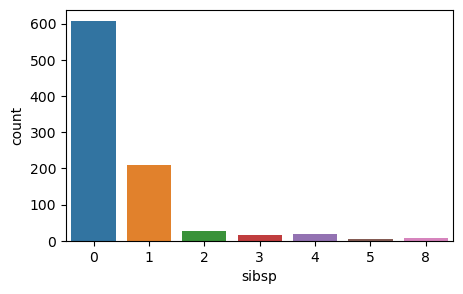

In [145]:
plt.figure(figsize=(5,3))
sns.countplot(x="sibsp",data=dataset)
plt.show()

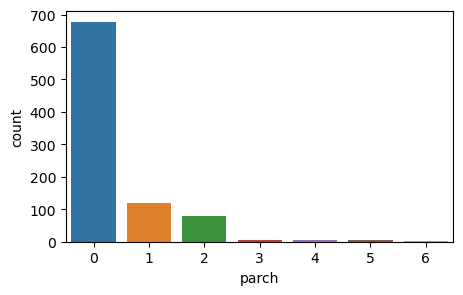

In [146]:
plt.figure(figsize=(5,3))
sns.countplot(x="parch",data=dataset)
plt.show()

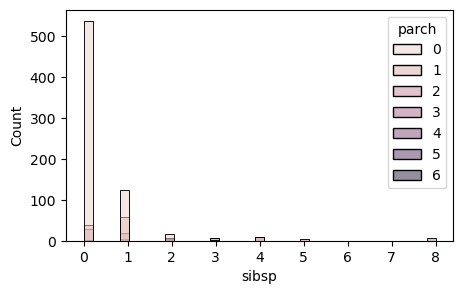

In [147]:
plt.figure(figsize=(5,3))
sns.histplot(x="sibsp",data=dataset,hue="parch")
plt.show()

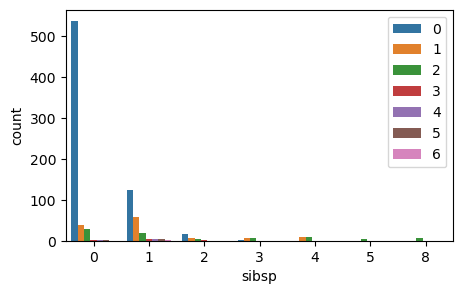

In [148]:
plt.figure(figsize=(5,3))
sns.countplot(x="sibsp",data=dataset,hue="parch")
plt.legend(loc=(1))
plt.show()

In [149]:
# plt.figure(figsize=(5,3))
# plt.pie(x="parch",data=dataset)
# plt.show()

# EDA

In [150]:
dataset.head(3)

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True


In [151]:
male = (577/dataset.shape[0])*100
female = (314/dataset.shape[0])*100

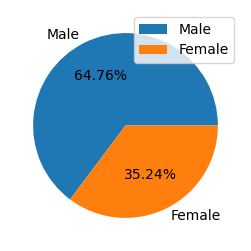

In [152]:
plt.figure(figsize=(5,3))
plt.pie(x=[male,female],labels=["Male","Female"],autopct="%0.2f%%")
plt.legend()
plt.show()

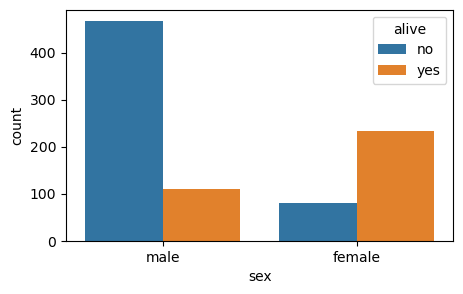

In [153]:
plt.figure(figsize=(5,3))
sns.countplot(x="sex",data=dataset,hue="alive")
plt.show()

In [154]:
pd.pivot_table(data=dataset,index="sex",columns="alive", values="who",aggfunc="count")

alive,no,yes
sex,,
female,81,233
male,468,109


In [155]:
dataset["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [156]:
dataset.head(3)

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True


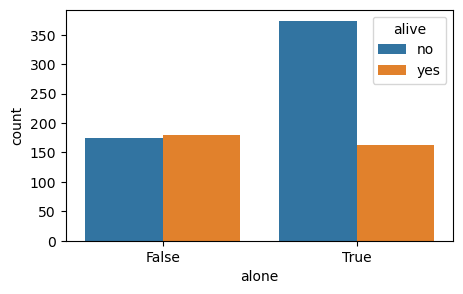

In [157]:
plt.figure(figsize=(5,3))
sns.countplot(x="alone",data=dataset,hue="alive")
plt.show()

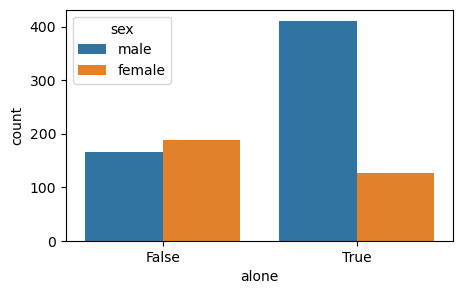

In [158]:
plt.figure(figsize=(5,3))
sns.countplot(x="alone",data=dataset,hue="sex")
plt.show()

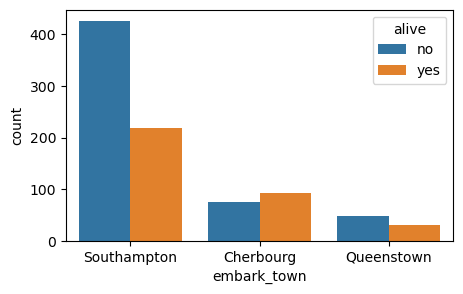

In [159]:
plt.figure(figsize=(5,3))
sns.countplot(x="embark_town",data=dataset,hue="alive")
plt.show()

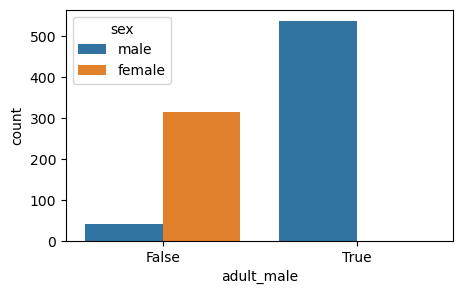

In [160]:
plt.figure(figsize=(5,3))
sns.countplot(x="adult_male",data=dataset,hue="sex")
plt.show()

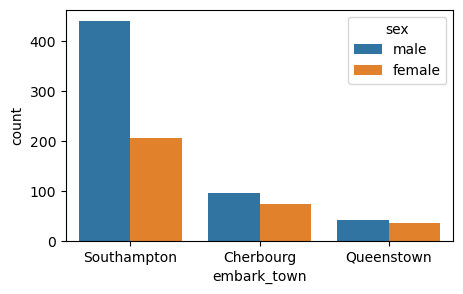

In [161]:
plt.figure(figsize=(5,3))
sns.countplot(x="embark_town",data=dataset,hue="sex")
plt.show()

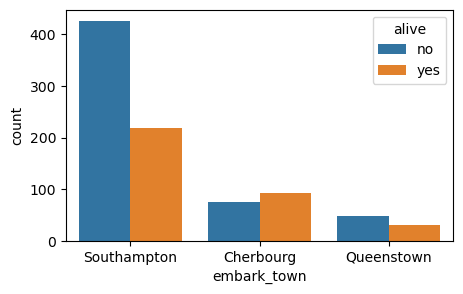

In [162]:
plt.figure(figsize=(5,3))
sns.countplot(x="embark_town",data=dataset,hue="alive")
plt.show()

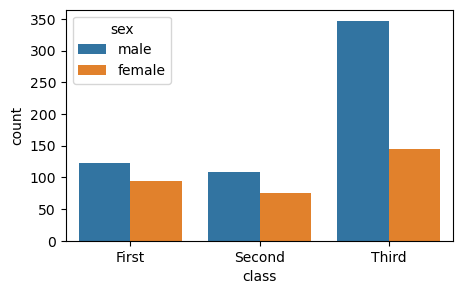

In [163]:
plt.figure(figsize=(5,3))
sns.countplot(x="class",data=dataset,hue="sex")
plt.show()

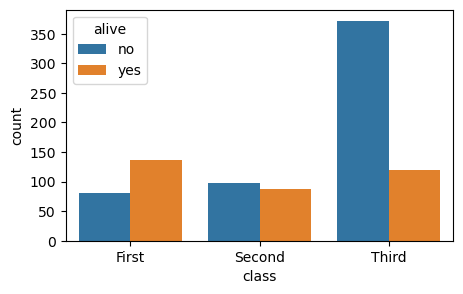

In [164]:
plt.figure(figsize=(5,3))
sns.countplot(x="class",data=dataset,hue="alive")
plt.show()

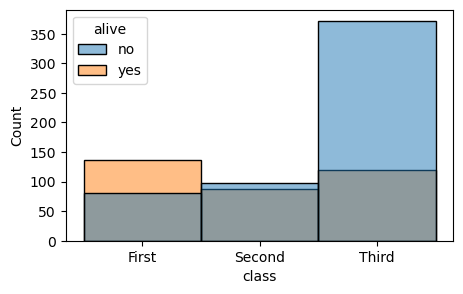

In [165]:
plt.figure(figsize=(5,3))
sns.histplot(x="class",data=dataset,hue="alive")
plt.show()

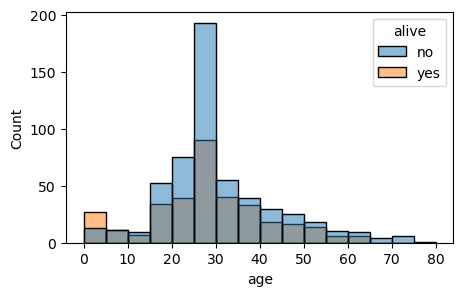

In [166]:
plt.figure(figsize=(5,3))
sns.histplot(x="age",data=dataset,bins=[i for i in range(0,81,5)],hue="alive")
plt.show()

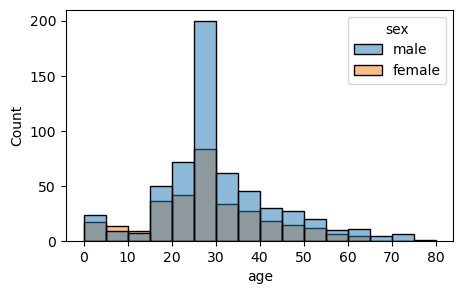

In [167]:
plt.figure(figsize=(5,3))
sns.histplot(x="age",data=dataset,bins=[i for i in range(0,81,5)],hue="sex")
plt.show()

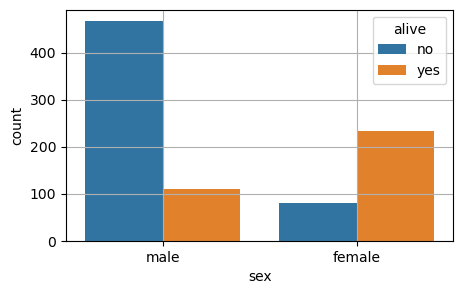

In [168]:
plt.figure(figsize=(5,3))
sns.countplot(x="sex",data=dataset,hue="alive")
plt.grid()
plt.show()

In [169]:
pd.pivot_table(data=dataset,index="sex",columns="alive",aggfunc="count",values="who")

alive,no,yes
sex,,
female,81,233
male,468,109


In [170]:
dataset.shape

(891, 12)

In [171]:
dataset["alive"].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [172]:
no = (549/dataset.shape[0])*100
yes = (342/dataset.shape[0])*100

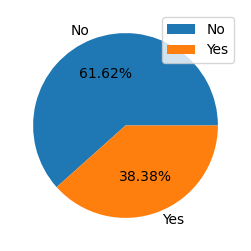

In [173]:
plt.figure(figsize=(5,3))
plt.pie(x=[no,yes],autopct="%0.2f%%",labels=["No","Yes"])
plt.legend()
plt.show()

In [174]:
dataset.shape[0]

891

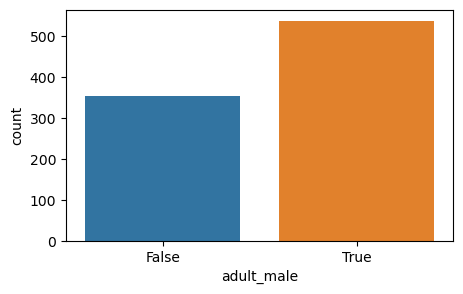

In [175]:
plt.figure(figsize=(5,3))
sns.countplot(x="adult_male",data=dataset)
plt.show()

In [176]:
dataset["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [177]:
first = (216/891)*100
second = (184/891)*100
third = (491/891)*100

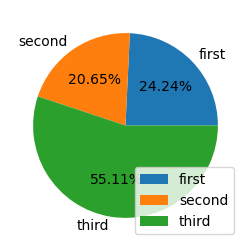

In [178]:
plt.figure(figsize=(5,3))
plt.pie(x=[first,second,third],autopct="%0.2f%%",labels=["first","second","third"])
plt.legend(loc=(4))
plt.show()

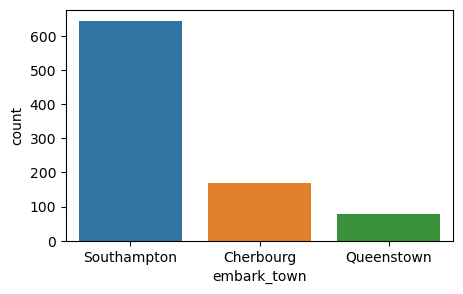

In [179]:
plt.figure(figsize=(5,3))
sns.countplot(x="embark_town",data=dataset)
plt.show()

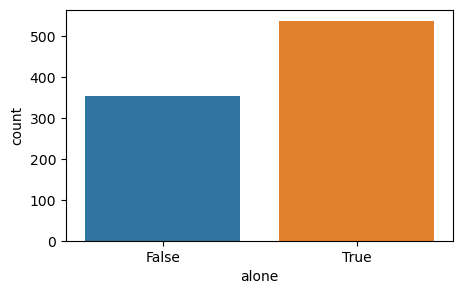

In [180]:
plt.figure(figsize=(5,3))
sns.countplot(x="alone",data=dataset)
plt.show()

In [181]:
dataset.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


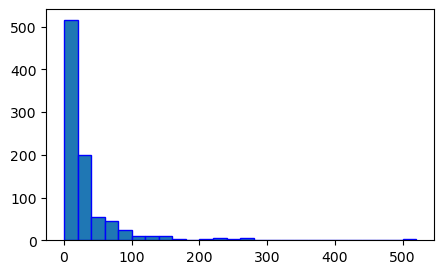

In [182]:
plt.figure(figsize=(5,3))
plt.hist(x="fare",data=dataset,edgecolor="b",bins=[i for i in range(0,521,20)])
plt.show()

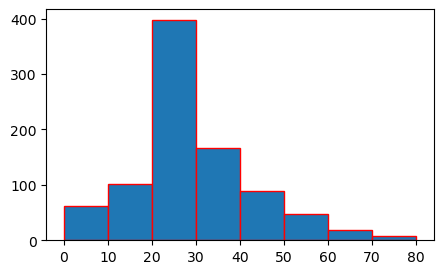

In [183]:
plt.figure(figsize=(5,3))
plt.hist(x="age",data=dataset,bins=[i for i in range(0,81,10)],edgecolor="r")
plt.show()

# Exploratory Data Analysis
1. COVID-19 Analysis: Analyse COVID-19 datasets to explore the spread and impactof the virus in different regions, identifying trends and patterns.

2. Airbnb Rental Analysis: Explore an Airbnb dataset to understand the factors thatinfluence rental prices and identify popular rental locations.

3. Social Media Sentiment Analysis: Perform EDA on social media data to analyseuser sentiments towards a particular topic or brand.

4. Stock Market Analysis: Analyse historical stock market data to identify trends,patterns, and correlations between different stocks.

5. Energy Consumption Analysis: Analyse energy consumption data to understandpatterns, peak hours, and factors influencing energy usage.

6. Traffic Accident Analysis: Analyse a dataset containing traffic accident information to identify factors contributing to accidents and develop insights for accident prevention.

7. Movie Recommendation Analysis: Analyse movie ratings and user preferences tobuild a recommendation system and suggest movies to users based on theirinterests.

8. Food Delivery Analysis: Analyse a food delivery dataset to understand customerpreferences, delivery patterns, and popular food choices.

9. Climate Change Analysis: Analyse climate data to identify long-term trends,patterns, and potential impacts of climate change on various regions.

10. E-commerce Sales Analysis: Analyse e-commerce sales data to identify popularproducts, customer buying patterns, and factors affecting sales performance.

1. COVID-19 Analysis: Analyse COVID-19 datasets to explore the spread and impactof the virus in different regions, identifying trends and patterns.
 https://www.kaggle.com/datasets/imdevskp/corona-virus-report

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
train=pd.read_csv("country_wise_latest.csv")
train.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [29]:
train.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [32]:
train.groupby(["Country/Region","WHO Region"]).sum()

,,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Country/Region,WHO Region,,,,,,,,,,,,,
Afghanistan,Eastern Mediterranean,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07
Albania,Europe,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00
Algeria,Africa,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07
Andorra,Europe,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60
Angola,Africa,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84
Antigua and Barbuda,Americas,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16
Argentina,Americas,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02
Armenia,Europe,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89
Australia,Western Pacific,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13


In [13]:
train.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [53]:
train.groupby("WHO Region")["Deaths"].sum().sort_values(ascending=False) [:5]

WHO Region
Americas                 342732
Europe                   211144
South-East Asia           41349
Eastern Mediterranean     38339
Africa                    12223
Name: Deaths, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


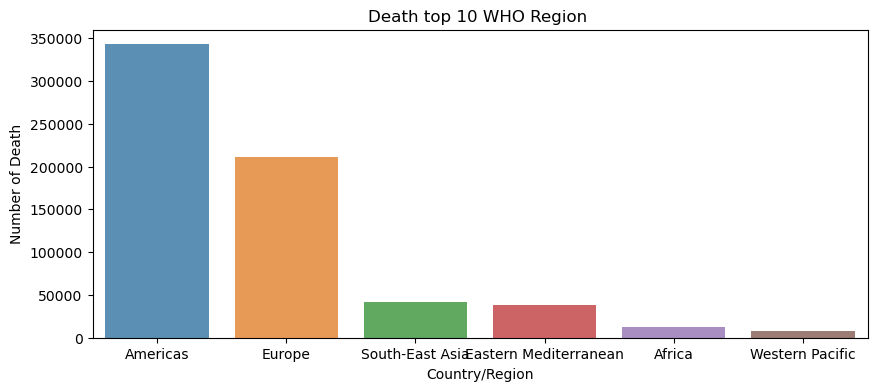

In [57]:
Country=train.groupby("WHO Region")["Deaths"].sum().sort_values(ascending=False) [:10]
plt.figure(figsize=(10,4))
sns.barplot(Country.index, Country.values, alpha=0.8)
plt.title('Death top 10 WHO Region ')
plt.ylabel('Number of Death', fontsize=10)
plt.xlabel('Country/Region', fontsize=10)
plt.show()

In [75]:
# import folium
# from folium.plugins import marker_cluster
# world_map=folium.Map(tiles="cartodbpositron")
# marker_cluster = MarkerCluster().add_to(world_map)
# for i in range(len(train)):
       
      
#         radius=6
#         popup_text = """Country/Region : {}<br>
#                     Confirmed : {}<br>
#                     death: {} <br>
#                     recovered:{} <br>
#                     Date:{} <br>"""
#         popup_text = popup_text.format(train.iloc[i]['Country/Region'],
#                                     train.iloc[i]['Confirmed'],
#                                     train.iloc[i]['death'],
#                                    train.iloc[i]['recovered'],
#                                     train.iloc[i]['train']
#                                    )
#         folium.CircleMarker(location = [], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
# world_map

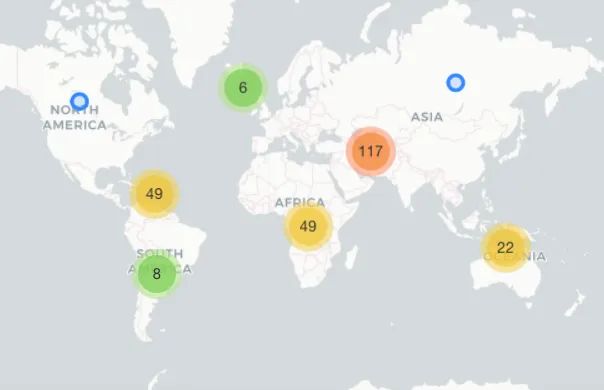

# 2. Airbnb Rental Analysis: Explore an Airbnb dataset to understand the factors thatinfluence rental prices and identify popular rental locations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv("AB_NYC_2019.csv")
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
train.shape

(48895, 16)

In [5]:
train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
train.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
train.dropna(inplace=True)

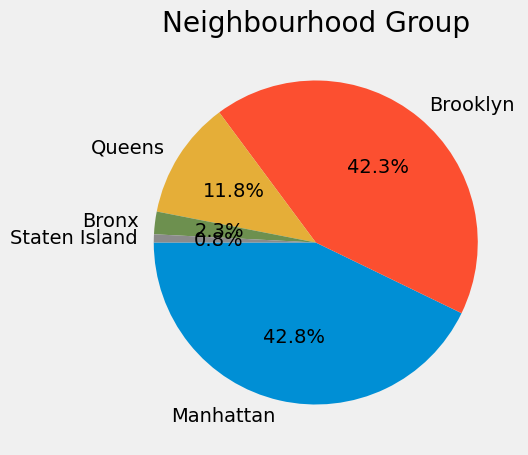

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(train.neighbourhood_group.value_counts(),labels=train.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

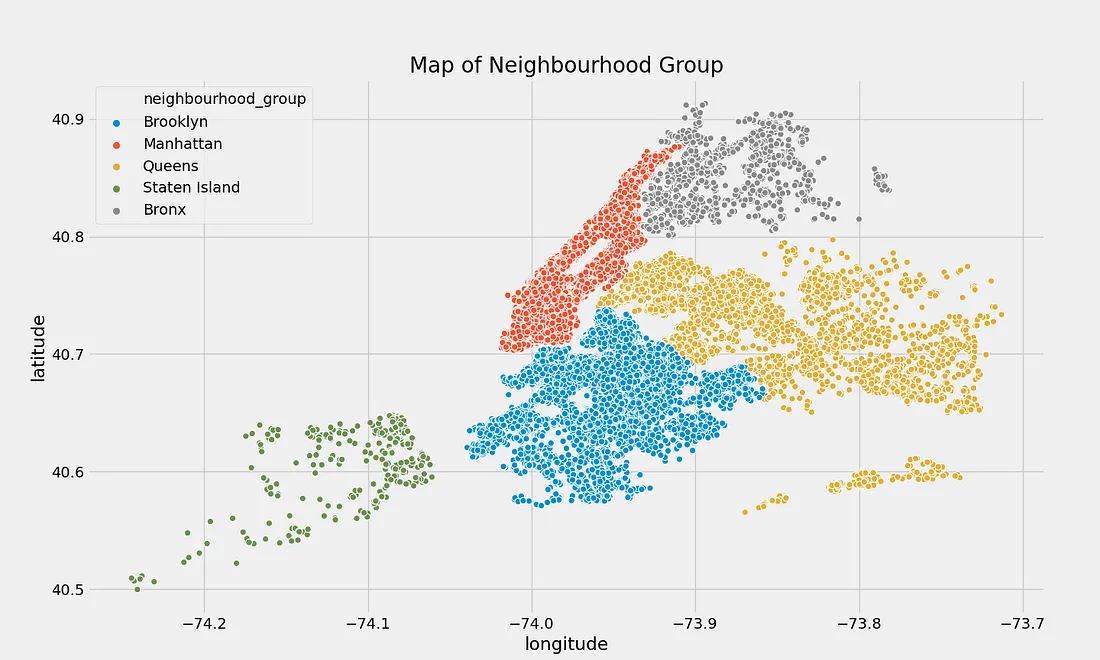

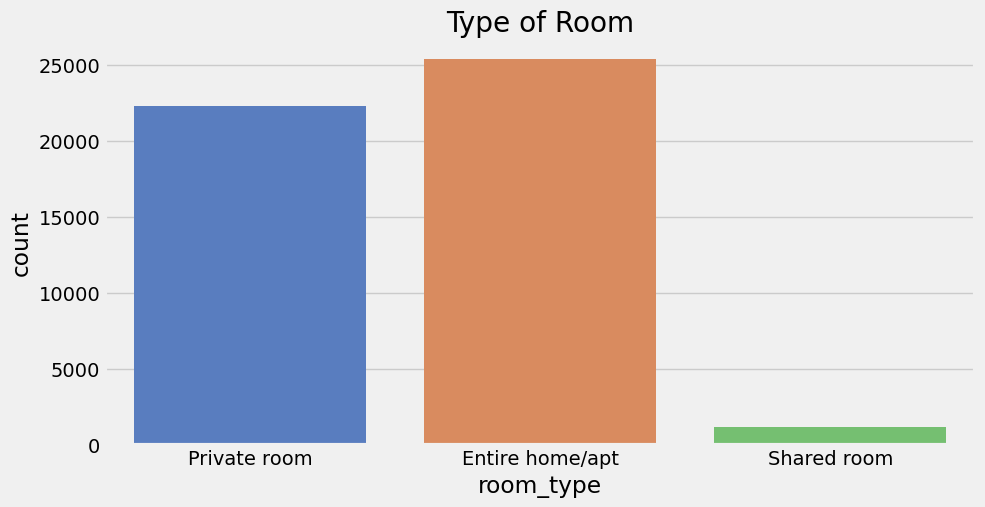

In [24]:
plt.figure(figsize=(10,5))
plt.title("Type of Room")
sns.countplot(x=train.room_type,palette="muted")
fig = plt.gcf()
plt.show()

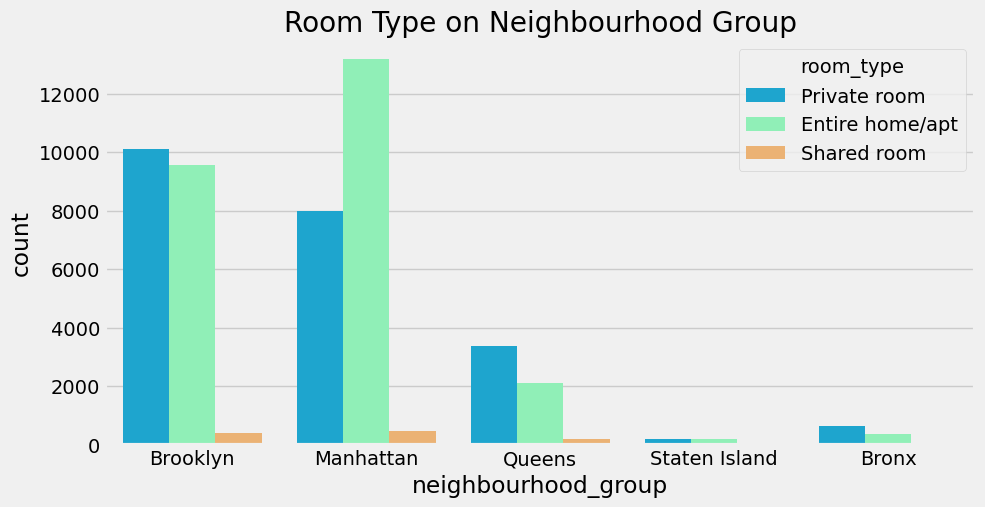

In [28]:
plt.figure(figsize=(10,5))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x=train.neighbourhood_group,hue=train.room_type,palette="rainbow")
plt.show()

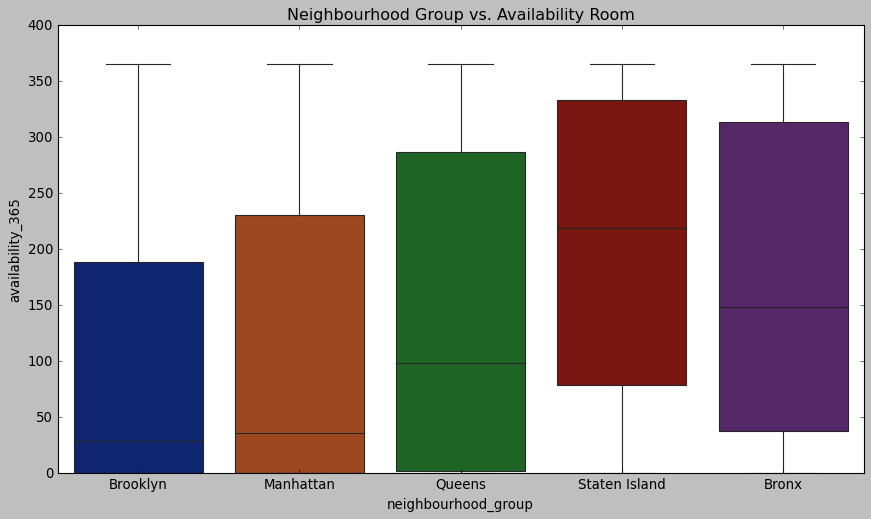

In [34]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=train, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

<Figure size 800x400 with 0 Axes>

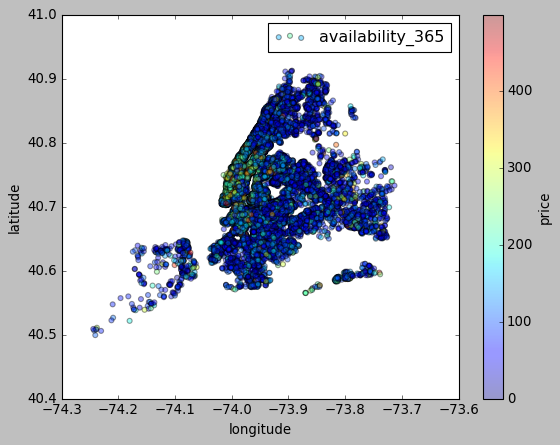

In [40]:
plt.figure(figsize=(10,5))
ax=train[train.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

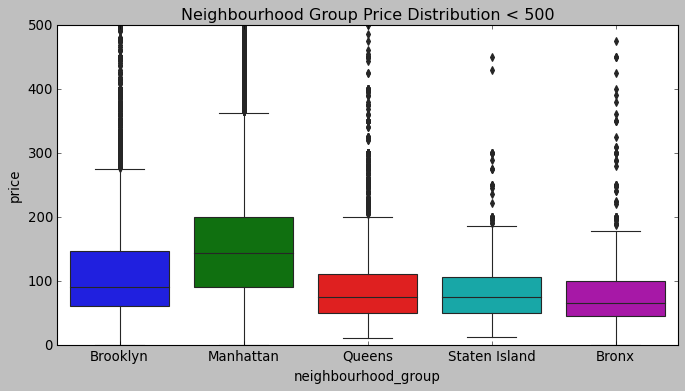

In [41]:
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = train[train.price<500])
plt.show()

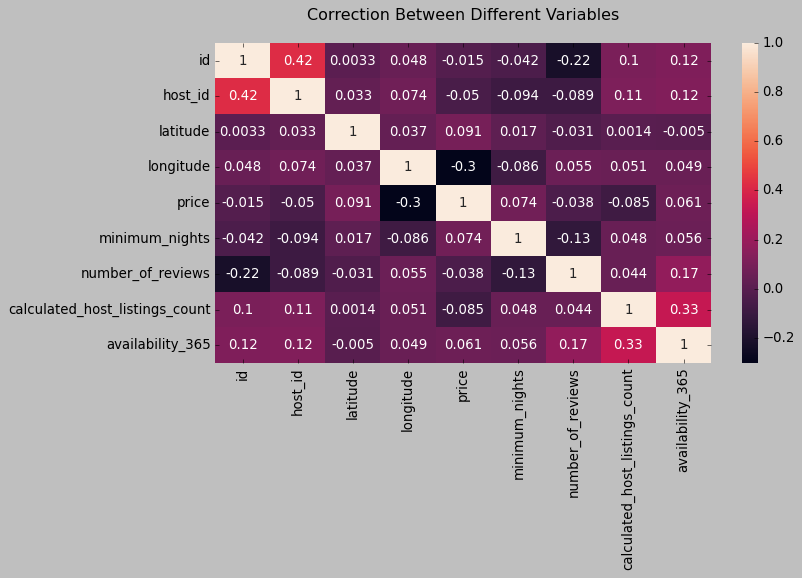

In [43]:
corr = train.corr(method='kendall')
plt.figure(figsize=(10,5))
plt.title("Correction Between Different Variables\n")
sns.heatmap(corr,annot=True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [46]:
encode = preprocessing.LabelEncoder()

In [49]:
encode.fit(train.neighbourhood_group)
train.neighbourhood_group=encode.transform(train.neighbourhood_group)

In [51]:
encode = preprocessing.LabelEncoder()
encode.fit(train.neighbourhood)
train.neighbourhood=encode.transform(train.neighbourhood)
encode = preprocessing.LabelEncoder()
encode.fit(train.room_type)
train.room_type=encode.transform(train.room_type)
train.sort_values(by='price',ascending=True,inplace=True)

In [53]:
l_reg = LinearRegression()
X = train[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

LinearRegression()

In [56]:
Predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, Predicts)))
print("R2 Score: ", r2_score(y_test,Predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,Predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,Predicts))

Mean Squared Error:  170.75380015934837
R2 Score:  13.783199028266734
Mean Absolute Error:  71.58371577922173
Mean Squareroot Error:  29156.860268858683


In [59]:
lr_pred_df = pd.DataFrame({'actual_values': np.array(y_test).flatten(),
'predicted_values': Predicts.flatten()}).head(20)

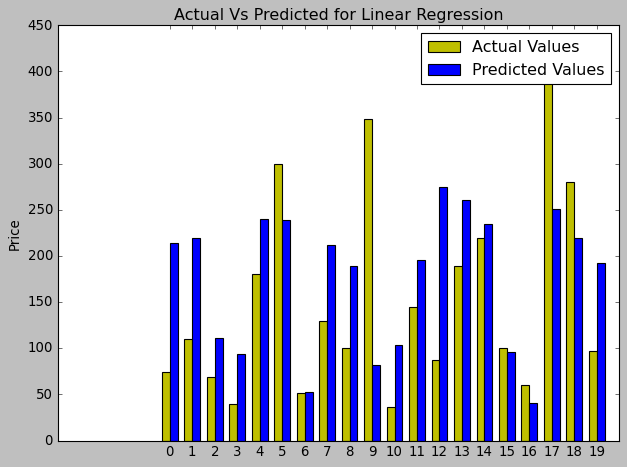

In [62]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values',color='y')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

# Social media analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# pd.set_option("display.max_row",10)
data = pd.read_csv("C:/Users/PRASHANT/Documents/social media dataset/social media influencers - youtube.csv")
data.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [3]:
data.describe()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
count,1000,1000,723,1000,839,1000,962,791
unique,998,998,23,228,27,743,615,420
top,PrestonPlayz,Bollywood Classics,Music & Dance,10.1M,United States,1.1M,1.2K,1.8K
freq,2,2,224,34,291,18,17,14


In [4]:
data.columns

Index(['youtuber name', 'channel name', 'Category', 'Subscribers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments'],
      dtype='object')

In [5]:
data.nunique()

youtuber name       998
channel name        998
Category             23
Subscribers         228
Audience Country     27
avg views           743
avg likes           615
avg comments        420
dtype: int64

# data cleaning

In [31]:
data.isnull().sum()

youtuber name    0
channel name     0
Subscribers      0
avg views        0
avg likes        0
avg comments     0
dtype: int64

<AxesSubplot:>

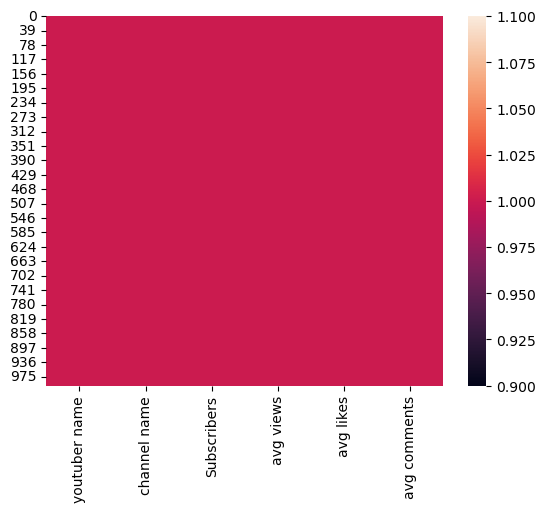

In [29]:
sns.heatmap(data.notnull())

In [10]:
data.drop(['Category','Audience Country'],axis=1,inplace=True)

In [11]:
data.fillna(method="ffill",axis=0,inplace=True)

In [12]:
data["avg likes"].fillna(value=9.8,inplace=True)

In [13]:
data.head()

,youtuber name,channel name,Subscribers,avg views,avg likes,avg comments
0,tseries,T-Series,212.1M,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,132.1M,13.8M,80.9K,290
2,setindia,SET India,130.4M,23.6K,314,21
3,PewDiePie,PewDiePie,111.4M,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,92.5M,30.6M,1.7M,67.7K


In [14]:
def remove_data(x):
    if ("K" in x):
        x = x[:-1]
        return eval(x)*1000
    elif ("M" in x):
        x = x[:-1]
        return eval(x)*100000
    else:
        return  eval(x)
        

In [15]:
data["Subscribers"]=data["Subscribers"].apply(remove_data)

In [16]:
data["avg views"]=data["avg views"].apply(remove_data)

In [17]:
data["avg likes"]=data["avg likes"].apply(remove_data)

In [18]:
data["avg comments"]=data["avg comments"].apply(remove_data)

In [19]:
data.head()

,youtuber name,channel name,Subscribers,avg views,avg likes,avg comments
0,tseries,T-Series,21210000.0,323700.0,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,13210000.0,1380000.0,80900.0,290.0
2,setindia,SET India,13040000.0,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,11140000.0,140000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,9250000.0,3060000.0,170000.0,67700.0


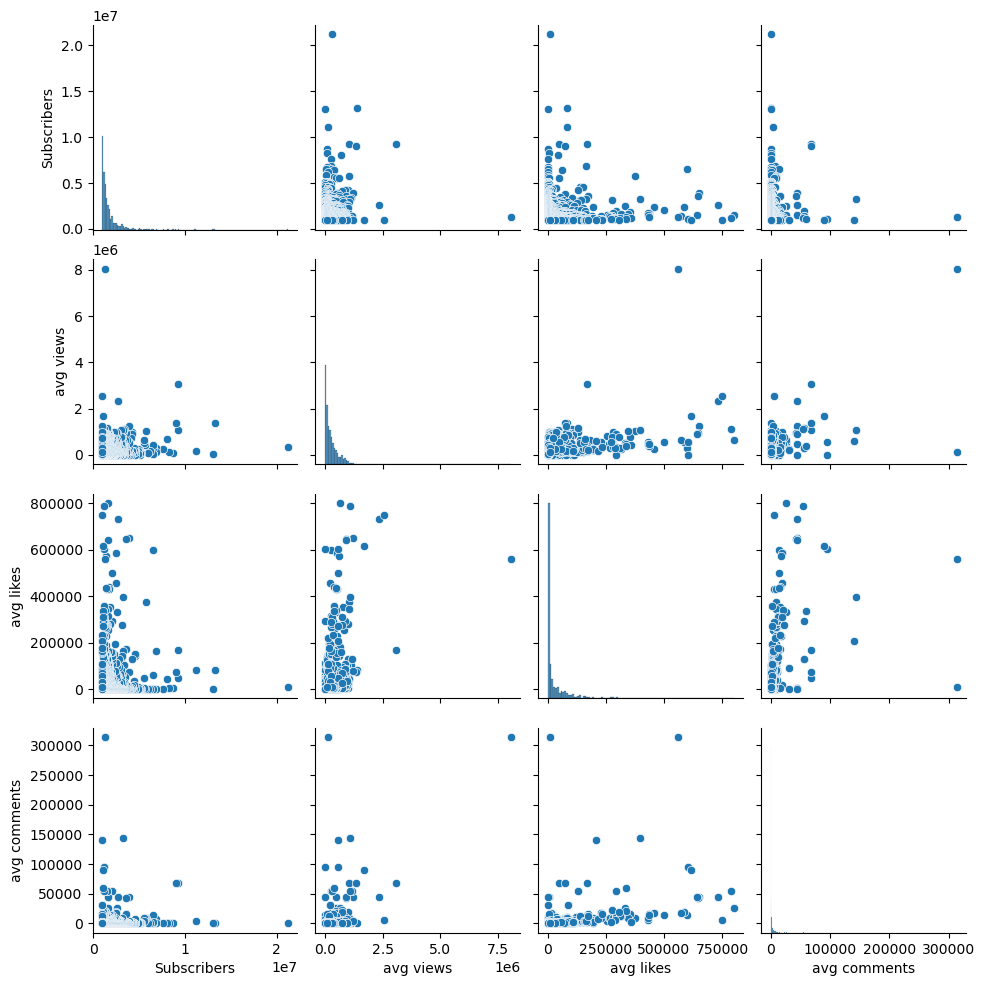

In [20]:
sns.pairplot(data)

In [21]:
data.info

<bound method DataFrame.info of     youtuber name                channel name  Subscribers  avg views  \
0         tseries                    T-Series   21210000.0   323700.0   
1       checkgate  Cocomelon - Nursery Rhymes   13210000.0  1380000.0   
2        setindia                   SET India   13040000.0    23600.0   
3       PewDiePie                   PewDiePie   11140000.0   140000.0   
4     MrBeast6000                     MrBeast    9250000.0  3060000.0   
..            ...                         ...          ...        ...   
995   FutParódias                 FutParódias     920000.0   140000.0   
996       EL GATO                     EL GATO     920000.0   243800.0   
997    CinemaSins                  CinemaSins     920000.0   296000.0   
998    CricketICC                         ICC     920000.0    15200.0   
999       BRKsEDU                     BRKsEDU     920000.0   112300.0   

     avg likes  avg comments  
0       9800.0         290.0  
1      80900.0         290.0 

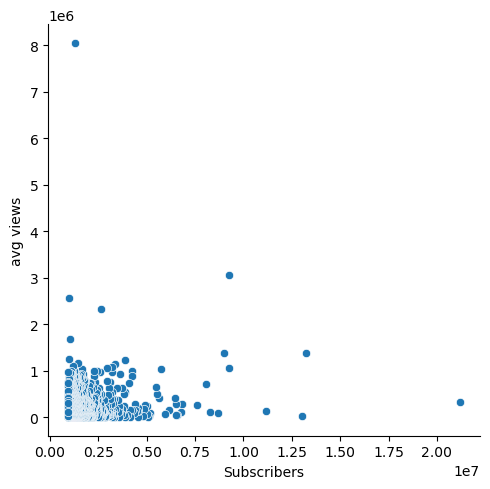

In [22]:
sns.relplot(x='Subscribers',y='avg views',data=data)

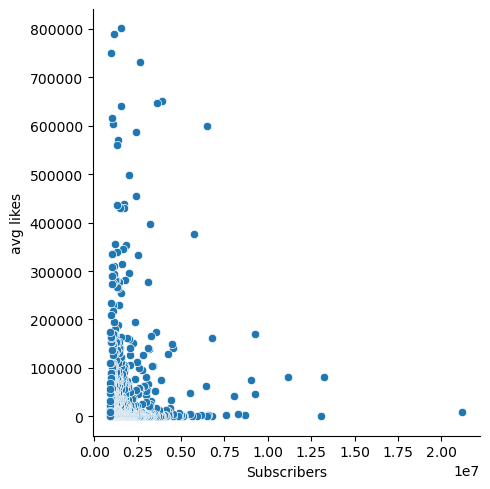

In [23]:
sns.relplot(x='Subscribers',y='avg likes',data=data)

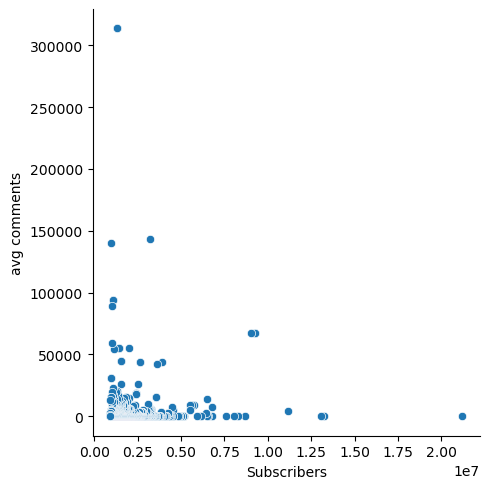

In [24]:
sns.relplot(x='Subscribers',y='avg comments',data=data)

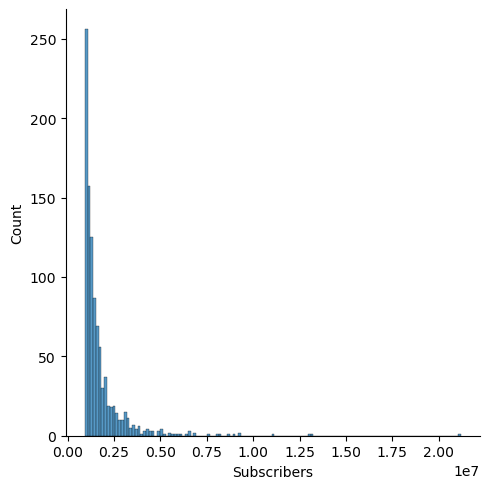

In [25]:
sns.displot(x=data['Subscribers'])
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

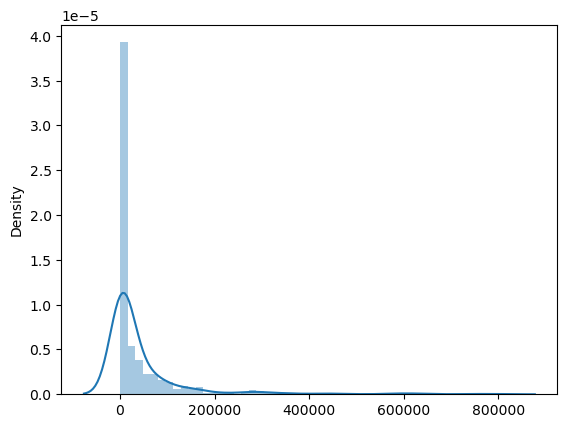

In [26]:
sns.distplot(x=data['avg likes'])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

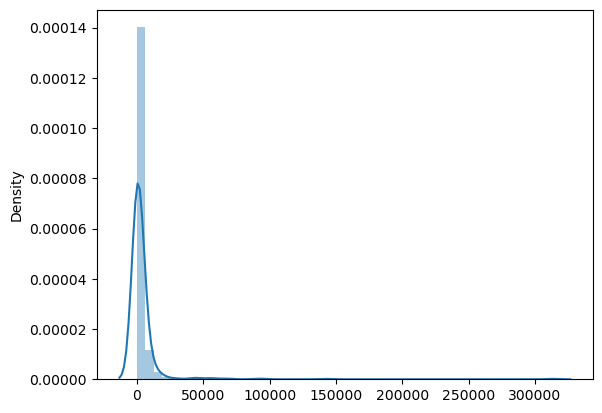

In [27]:
sns.distplot(x=data["avg comments"])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

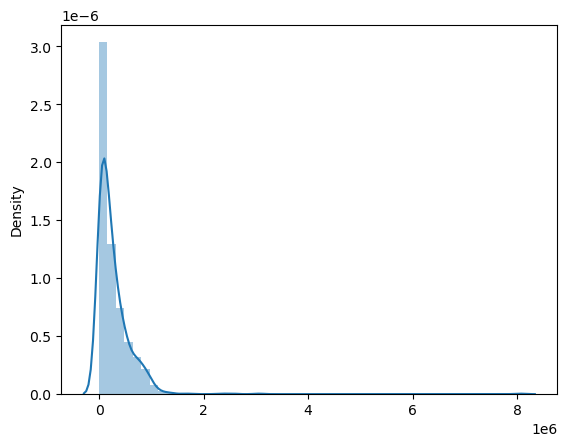

In [28]:
sns.distplot(x=data["avg views"])

# Energy Consumption Analysis

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv("C:/Users/PRASHANT/Documents/Energy consuption dataset/KwhConsumptionBlower78_1.csv")
data.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [72]:
data.shape

(1228, 4)

In [73]:
data.info

<bound method DataFrame.info of       Unnamed: 0      TxnDate   TxnTime  Consumption
0          76229  01 Jan 2022  16:55:52        1.010
1          76258  01 Jan 2022  21:45:29        0.908
2          76287  01 Jan 2022  12:24:52        0.926
3          76316  01 Jan 2022  04:07:36        0.928
4          76345  01 Jan 2022  06:52:25        0.916
...          ...          ...       ...          ...
1223       97922  20 Jan 2022  21:43:55        5.128
1224       97951  20 Jan 2022  09:43:03        5.924
1225       97980  20 Jan 2022  03:06:05        4.664
1226       98009  20 Jan 2022  06:16:38        3.474
1227       98038  20 Jan 2022  16:48:03        2.478

[1228 rows x 4 columns]>

In [74]:
data.describe()

,Unnamed: 0,Consumption
count,1228.000000,1228.000000
mean,85021.511401,3.428194
std,6275.942563,3.535620
min,73596.000000,0.842000
25%,78825.750000,0.952000
50%,84652.000000,1.121000
75%,90715.250000,5.754500
max,98038.000000,27.108000


In [75]:
data.columns=['Power_house', 'Date', 'Time', 'Consumption']
data.columns

Index(['Power_house', 'Date', 'Time', 'Consumption'], dtype='object')

In [76]:
data.head()

,Power_house,Date,Time,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [77]:
data.isnull().sum()

Power_house    0
Date           0
Time           0
Consumption    0
dtype: int64

<AxesSubplot:>

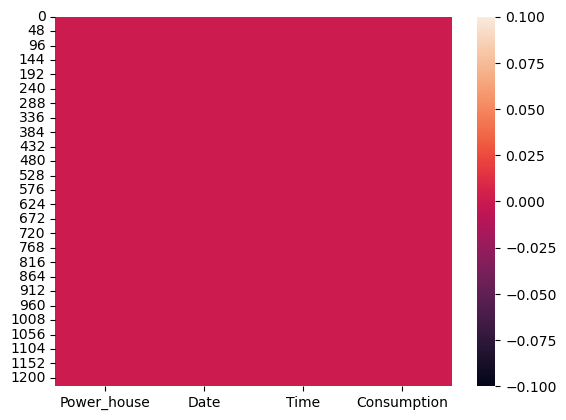

In [78]:
sns.heatmap(data.isnull())

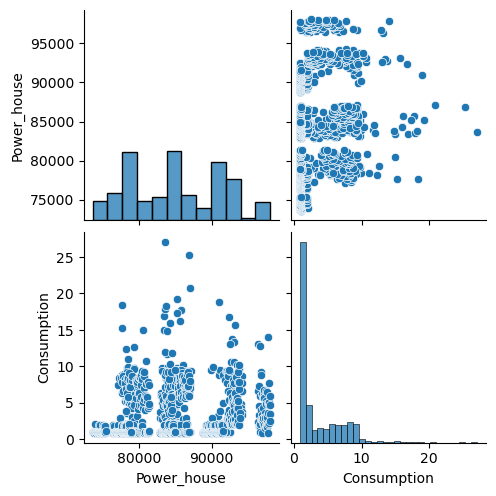

In [79]:
sns.pairplot(data)
plt.show()

In [80]:
p=data.corr()

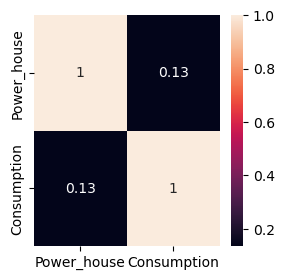

In [81]:
plt.figure(figsize=(3,3))
sns.heatmap(p,annot=True)
plt.show()

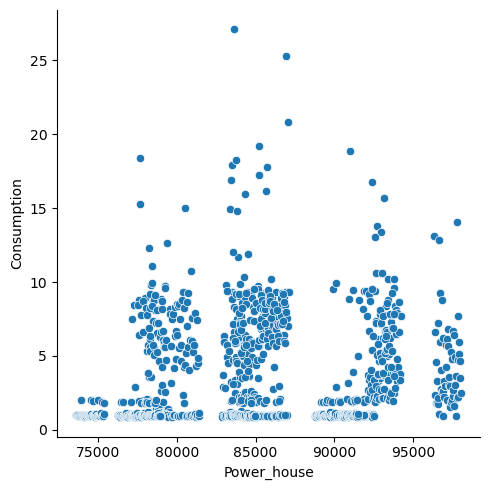

In [82]:
sns.relplot(x='Power_house',y='Consumption',data=data)
plt.show()

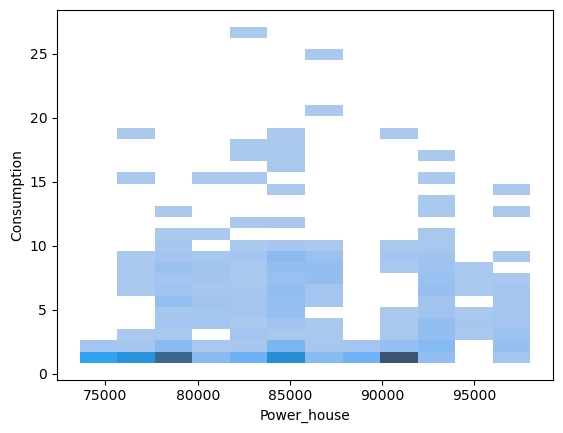

In [83]:
sns.histplot(x='Power_house',y='Consumption',data=data)
plt.show()

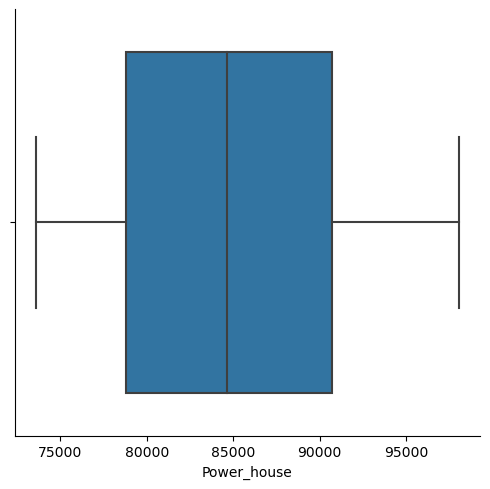

In [84]:
sns.catplot(x='Power_house',kind='box',data=data)
plt.show()

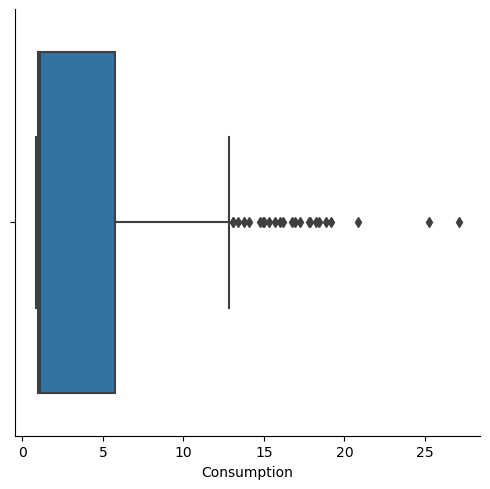

In [85]:
sns.catplot(x='Consumption',kind='box',data=data)
plt.show()

# remove outlier

In [86]:
Q1=data["Consumption"].quantile(0.25)
Q1

0.952

In [87]:
Q3=data["Consumption"].quantile(0.75)
Q3

5.7545

In [88]:
IQR = Q3-Q1
IQR

4.8025

In [89]:
min_fins = Q1-(1.5*IQR)
min_fins

-6.25175

In [90]:
max_fins = Q3+(1.5*IQR)
max_fins

12.95825

In [68]:
data["Consumption"]<= max_fins

0       True
1       True
2       True
3       True
4       True
        ... 
1223    True
1224    True
1225    True
1226    True
1227    True
Name: Consumption, Length: 1228, dtype: bool

# Traffic Accident Analysis: Analyse a dataset containing traffic accident information to identify factors contributing to accidents and develop insights for accident prevention.

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np

In [116]:
data=pd.read_csv("C:/Users/PRASHANT/Documents/NYC Accidents 2020.csv")
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [117]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [119]:
p=data.select_dtypes(include=['float64','int64'])
p

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
0,10466.0,40.892100,-73.833760,0,0,0,0,0,0,0,0,4342908
1,11221.0,40.690500,-73.919914,2,0,0,0,0,0,2,0,4343555
2,NaN,40.816500,-73.946556,1,0,1,0,0,0,0,0,4343142
3,10459.0,40.824720,-73.892960,0,0,0,0,0,0,0,0,4343588
4,11203.0,40.649890,-73.933890,0,0,0,0,0,0,0,0,4342953
...,...,...,...,...,...,...,...,...,...,...,...,...
74876,10459.0,40.826810,-73.896510,0,0,0,0,0,0,0,0,4268088
74877,11235.0,40.582935,-73.959210,0,0,0,0,0,0,0,0,4267756
74878,10461.0,40.848553,-73.830055,0,0,0,0,0,0,0,0,4269230
74879,10017.0,40.753624,-73.969440,0,0,0,0,0,0,0,0,4267482


In [120]:
data.select_dtypes(include=['object'])

,CRASH DATE,CRASH TIME,BOROUGH,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,Backing Unsafely,NaN,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74876,2020-01-01,15:13:00,BRONX,POINT (-73.89651 40.82681),NaN,NaN,1122 INTERVALE AVENUE,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
74877,2020-01-01,08:00:00,BROOKLYN,POINT (-73.95921 40.582935),NaN,NaN,3401 GUIDER AVENUE,Passing Too Closely,Unspecified,Unspecified,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
74878,2020-01-01,11:36:00,BRONX,POINT (-73.830055 40.848553),NaN,NaN,1810 MAHAN AVENUE,Unspecified,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
74879,2020-01-01,01:45:00,MANHATTAN,POINT (-73.96944 40.753624),EAST 48 STREET,2 AVENUE,NaN,Passing or Lane Usage Improper,Driver Inattention/Distraction,NaN,NaN,NaN,Sedan,Taxi,NaN,NaN,NaN


In [121]:
data.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,49134.000000,68935.000000,68935.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,7.488100e+04
mean,10913.681585,40.689825,-73.843376,0.366555,0.001923,0.054740,0.000748,0.043709,0.000120,0.268105,0.001055,4.305762e+06
std,515.069483,1.233368,2.234881,0.726178,0.047609,0.237582,0.027337,0.209737,0.010963,0.691423,0.037073,2.171658e+04
min,10000.000000,0.000000,-74.253006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.063247e+06
25%,10458.000000,40.667076,-73.958680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.287041e+06
50%,11210.000000,40.716885,-73.916850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.305812e+06
75%,11354.000000,40.789445,-73.862630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.324545e+06
max,11697.000000,40.912884,0.000000,15.000000,4.000000,6.000000,1.000000,3.000000,1.000000,15.000000,4.000000,4.343622e+06


In [122]:
len(data.columns)

29

<AxesSubplot:>

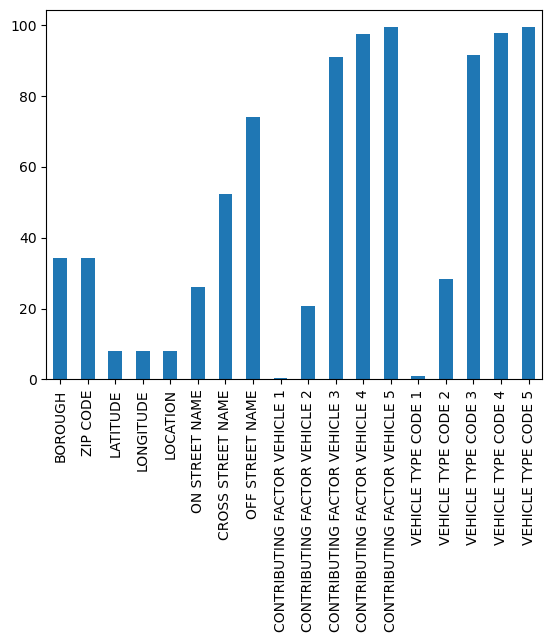

In [123]:
percentage_of_missing_values=data.isna().sum()/len(data)*100
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind="bar")

In [134]:
p.isnull().sum()

ZIP CODE                         25747
LATITUDE                          5946
LONGITUDE                         5946
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
COLLISION_ID                         0
dtype: int64

In [125]:
m=data['ZIP CODE'].mean()
m

10913.68158505312

In [126]:
n=data['LATITUDE'].mean()
n

40.68982506523545

In [127]:
o=data['LONGITUDE'].mean()
o

-73.84337572540797

In [128]:
data['ZIP CODE'].fillna(m,inplace=True)

In [129]:
data['LATITUDE'].fillna(n,inplace=True)

In [130]:
data['LONGITUDE'].fillna(o,inplace=True)

In [133]:
data.isnull().sum()

CRASH DATE                       0.0
CRASH TIME                       0.0
BOROUGH                          0.0
ZIP CODE                         0.0
LATITUDE                         0.0
LONGITUDE                        0.0
LOCATION                         0.0
ON STREET NAME                   0.0
CROSS STREET NAME                0.0
OFF STREET NAME                  0.0
NUMBER OF PERSONS INJURED        0.0
NUMBER OF PERSONS KILLED         0.0
NUMBER OF PEDESTRIANS INJURED    0.0
NUMBER OF PEDESTRIANS KILLED     0.0
NUMBER OF CYCLIST INJURED        0.0
NUMBER OF CYCLIST KILLED         0.0
NUMBER OF MOTORIST INJURED       0.0
NUMBER OF MOTORIST KILLED        0.0
CONTRIBUTING FACTOR VEHICLE 1    0.0
CONTRIBUTING FACTOR VEHICLE 2    0.0
CONTRIBUTING FACTOR VEHICLE 3    0.0
CONTRIBUTING FACTOR VEHICLE 4    0.0
CONTRIBUTING FACTOR VEHICLE 5    0.0
COLLISION_ID                     0.0
VEHICLE TYPE CODE 1              0.0
VEHICLE TYPE CODE 2              0.0
VEHICLE TYPE CODE 3              0.0
V

In [132]:
data.dropna(inplace=True)

In [137]:
data['CONTRIBUTING FACTOR VEHICLE 1']

Series([], Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64)

# Movie Recommendation Analysis: Analyse movie ratings and user preferences tobuild a recommendation system and suggest movies to users based on theirinterests

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [144]:
data=pd.read_csv("C:/Users/PRASHANT/Documents/cinemaTicket_Ref.csv")
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [145]:
data.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [146]:
data.shape

(142524, 14)

In [147]:
data.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [148]:
data.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

In [157]:
data.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [152]:
o=data['occu_perc'].mean()

19.96598634821804

In [153]:
data['occu_perc'].fillna(o,inplace=True)

In [155]:
c=data['capacity'].mean()

In [156]:
data['capacity'].fillna(c,inplace=True)

In [161]:
d=data.corr()
d

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.000000,0.029530,0.009802,-0.005588,-0.000920,0.076670,-0.102824,0.104820,-0.005582,0.061196,0.851380,0.800933,-0.028686
cinema_code,0.029530,1.000000,-0.012910,-0.053716,0.019534,-0.187125,0.124359,0.005079,-0.053957,-0.353136,0.051027,0.049646,-0.000270
total_sales,0.009802,-0.012910,1.000000,0.915176,0.066810,0.509812,0.410946,0.272450,0.915112,0.375722,-0.080568,-0.051433,-0.000424
tickets_sold,-0.005588,-0.053716,0.915176,1.000000,0.071498,0.522088,0.490314,0.103596,0.999946,0.425206,-0.103477,-0.062666,-0.005037
tickets_out,-0.000920,0.019534,0.066810,0.071498,1.000000,0.078860,0.044040,0.011916,0.061091,0.037596,-0.012448,-0.007210,0.004441
show_time,0.076670,-0.187125,0.509812,0.522088,0.078860,1.000000,0.057583,0.176274,0.521625,0.681474,-0.023297,-0.020643,0.007646
occu_perc,-0.102824,0.124359,0.410946,0.490314,0.044040,0.057583,1.000000,0.085094,0.490194,-0.140211,-0.143221,-0.087401,-0.011141
ticket_price,0.104820,0.005079,0.272450,0.103596,0.011916,0.176274,0.085094,1.000000,0.103544,0.004285,0.048007,0.042031,0.001113
ticket_use,-0.005582,-0.053957,0.915112,0.999946,0.061091,0.521625,0.490194,0.103544,1.000000,0.425108,-0.103418,-0.062634,-0.005087
capacity,0.061196,-0.353136,0.375722,0.425206,0.037596,0.681474,-0.140211,0.004285,0.425108,1.000000,-0.025245,-0.023921,0.006252


<AxesSubplot:>

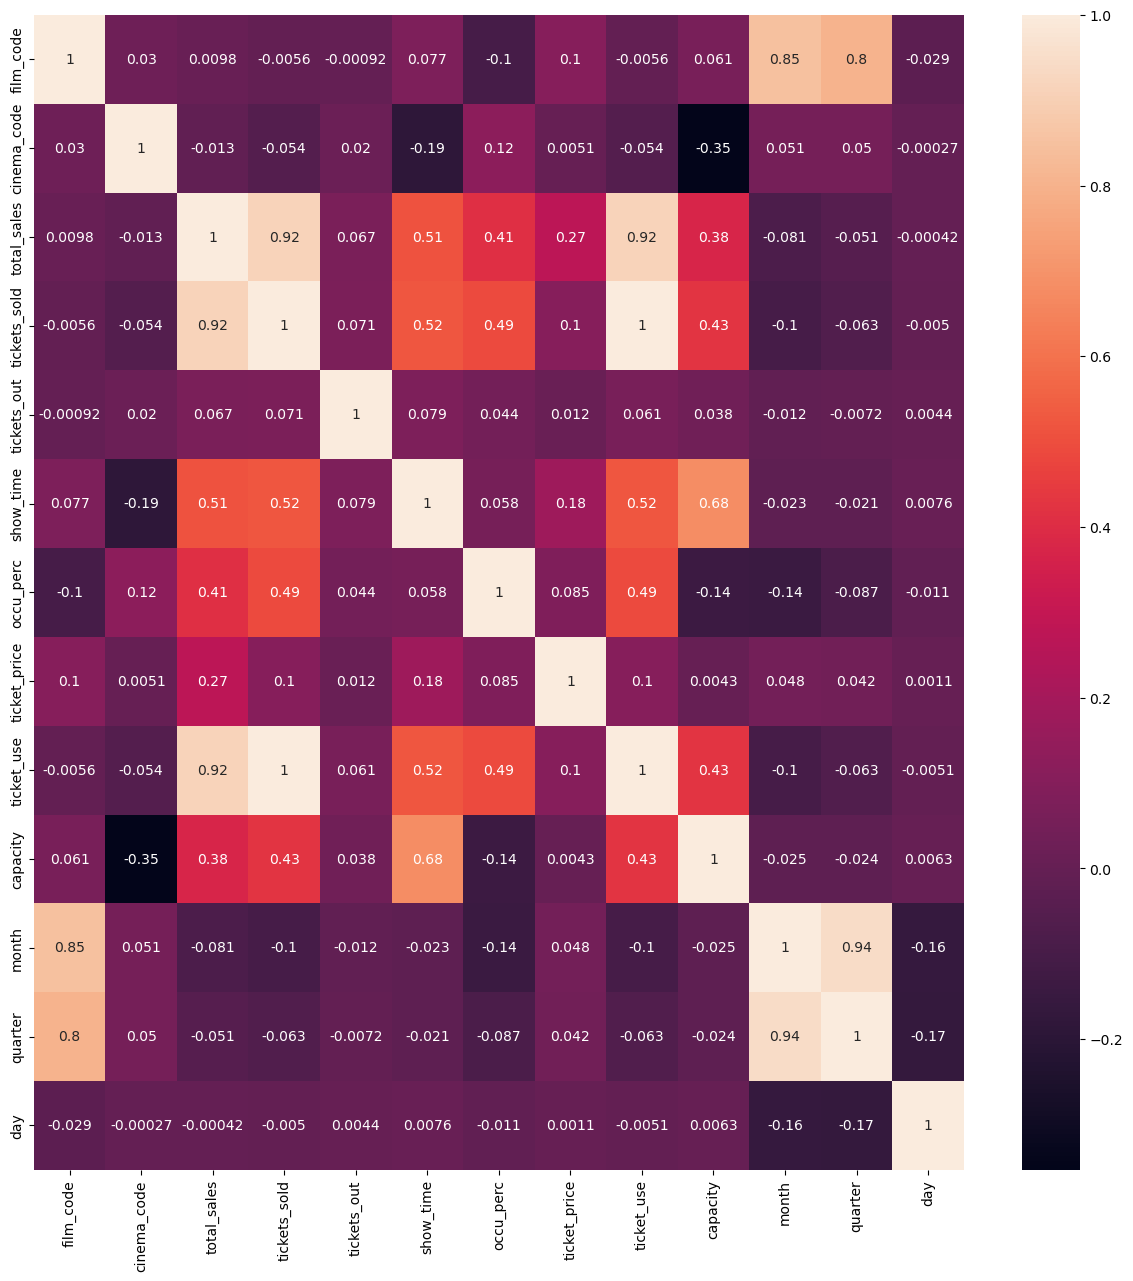

In [171]:
plt.figure(figsize=(15,15))
sns.heatmap(d,annot=True)

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
#Assigning X values based on correlation with y
X = data[['ticket_price', 'occu_perc', 'show_time', 'tickets_sold','ticket_use','capacity']]
Y = data['total_sales']

In [174]:
#Splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
#Splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

In [178]:
lr=LinearRegression()

In [180]:
lr.fit(X_train,Y_train)

LinearRegression()

In [181]:
y_pred = lr.predict(X_test)

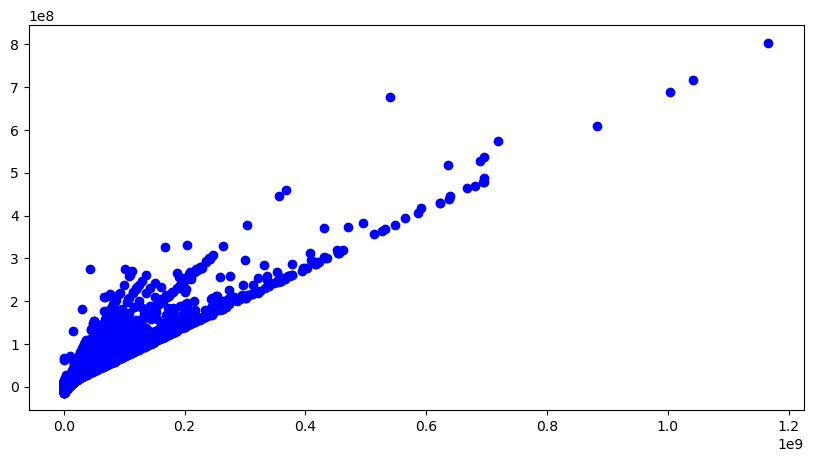

In [185]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test,y_pred,color='b')
plt.show()